# Create histograms with the volume data, that show the distribuition of the method chosed by manually setting the threshold value 



### Import dependencies

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# !pip install openpyxl 

### Read excel file

In [3]:
db = pd.read_excel("Volume_Calculation_manualThresh.xlsx") # uncomment code in cell above if pandas can't read the file 
db.head()



,filename,image_scale_factor,count,metric_to_pixel,volume
0,cell_frame004141_x0100_y0956_red.tif,0.633663,39635,0.001691,67.041530
1,cell_frame004141_x0220_y0163_red.tif,0.603774,34287,0.001955,67.042163
2,cell_frame004141_x0271_y0573_red.tif,0.561404,33678,0.002432,81.914688
3,cell_frame004141_x0308_y0201_red.tif,0.524590,35020,0.002981,104.399055
4,cell_frame004141_x0425_y0085_red.tif,0.551724,32836,0.002563,84.144386


### Extract cell volumes from database

In [4]:
cv = db["volume"]
cv.head()

0     67.041530
1     67.042163
2     81.914688
3    104.399055
4     84.144386
Name: volume, dtype: float64

### Fit a normal distribution to the data
 Adapted from @author: Prof. Dr. Cédric Bessire

In [5]:
print(type(cv))
cv = cv.to_numpy()
print(type(cv))
mean, std = norm.fit(cv)

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


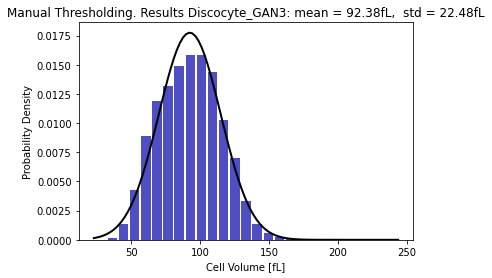

In [6]:
plt.hist(cv, bins=25, density=True, color='#0504aa', alpha=0.7, rwidth=0.85)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Manual Thresholding. Results Discocyte_GAN3: mean = %.2ffL,  std = %.2ffL" % (mean, std)
plt.title(title)
plt.xlabel('Cell Volume [fL]')
plt.ylabel('Probability Density')

plt.show()

# Create histograms with the volume data, that show the distribuition of the method used by SHAPR


In [7]:
db = pd.read_excel("Volume_Calculation_bySHAPR.xlsx") # uncomment code in cell above if pandas can't read the file 
db.head()


,filename,image_scale_factor,count,metric_to_pixel,volume
0,cell_frame004141_x0100_y0956_red.tif,0.633663,46037,0.001691,77.870340
1,cell_frame004141_x0220_y0163_red.tif,0.603774,40221,0.001955,78.645050
2,cell_frame004141_x0271_y0573_red.tif,0.561404,40378,0.002432,98.211036
3,cell_frame004141_x0308_y0201_red.tif,0.524590,43408,0.002981,129.404745
4,cell_frame004141_x0425_y0085_red.tif,0.551724,40738,0.002563,104.393775


In [8]:
cv = db["volume"]
cv.head()

0     77.870340
1     78.645050
2     98.211036
3    129.404745
4    104.393775
Name: volume, dtype: float64

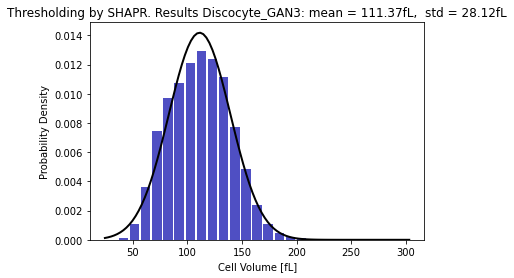

In [9]:

cv = cv.to_numpy()
mean, std = norm.fit(cv)
plt.hist(cv, bins=25, density=True, color='#0504aa', alpha=0.7, rwidth=0.85)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Thresholding by SHAPR. Results Discocyte_GAN3: mean = %.2ffL,  std = %.2ffL" % (mean, std)
plt.title(title)
plt.xlabel('Cell Volume [fL]')
plt.ylabel('Probability Density')

plt.show()

### Compare both and calculate the probability that a prediction lies between 89 and 94fL.

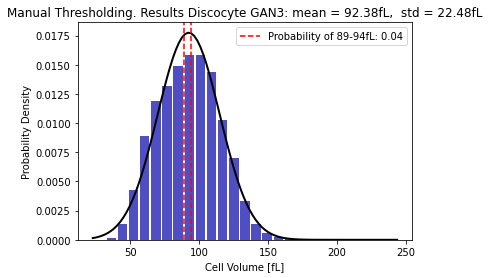

Manual Thresholding: Area under the curve from 89 to 94 : 0.03947872394174507


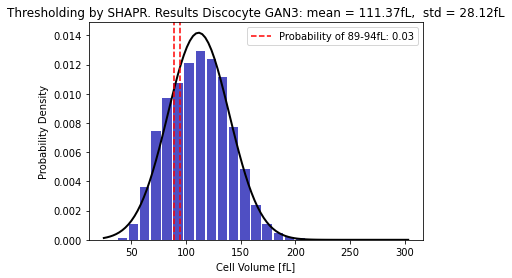

Thresholding by SHAPR: Area under the curve from 89 to 94 : 0.030511304365835407


In [10]:
db = pd.read_excel("Volume_Calculation_manualThresh.xlsx") # uncomment code in cell above if pandas can't read the file 
cv = db["volume"]
cv = cv.to_numpy()
mean, std = norm.fit(cv)
plt.hist(cv, bins=25, density=True, color='#0504aa', alpha=0.7, rwidth=0.85)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Manual Thresholding. Results Discocyte GAN3: mean = %.2ffL,  std = %.2ffL" % (mean, std)
plt.title(title)
plt.xlabel('Cell Volume [fL]')
plt.ylabel('Probability Density')

x_start = 89
x_end = 94

start_index = np.argmax(x >= x_start)
end_index = np.argmax(x >= x_end)

# calculate the probability that a measurement is between 89 and 94fL, which are normal rbc volumes  for a healthy male. 
area_under_curve = np.trapz(p[start_index:end_index], x[start_index:end_index])
plt.axvline(x=x_start, color='r', linestyle='--', label=f'Probability of {x_start}-{x_end}fL: {round(area_under_curve,2)}')
plt.axvline(x=x_end, color='r', linestyle='--')
plt.legend()
plt.show()

print("Manual Thresholding: Area under the curve from", x_start, "to", x_end, ":", area_under_curve)



db1 = pd.read_excel("Volume_Calculation_bySHAPR.xlsx") # uncomment code in cell above if pandas can't read the file 
cv1 = db1["volume"]

cv1 = cv1.to_numpy()
mean1, std1 = norm.fit(cv1)
plt.hist(cv1, bins=25, density=True, color='#0504aa', alpha=0.7, rwidth=0.85)
xmin1, xmax1 = plt.xlim()
x1 = np.linspace(xmin1, xmax1, 100)
p1 = norm.pdf(x1, mean1, std1)
plt.plot(x1, p1, 'k', linewidth=2)
title1 = "Thresholding by SHAPR. Results Discocyte GAN3: mean = %.2ffL,  std = %.2ffL" % (mean1, std1)
plt.title(title1)
plt.xlabel('Cell Volume [fL]')
plt.ylabel('Probability Density')

# calculate the probability that a measurement is between 89 and 94fL, which are normal rbc volumes  for a healthy male. 
x_start = 89
x_end = 94

start_index = np.argmax(x1 >= x_start)
end_index = np.argmax(x1 >= x_end)

area_under_curve = np.trapz(p1[start_index:end_index], x1[start_index:end_index])

plt.axvline(x=x_start, color='r', linestyle='--', label=f'Probability of {x_start}-{x_end}fL: {round(area_under_curve,2)}')
plt.axvline(x=x_end, color='r', linestyle='--')
plt.legend()
plt.show()
print("Thresholding by SHAPR: Area under the curve from", x_start, "to", x_end, ":", area_under_curve)